In [1]:
import pandas
import numpy as np

import matplotlib.pyplot as plt

df = pandas.read_csv('http://pogo.software/me4ml/xray.csv')

x = np.array(df['Distance (mm)'][:]) 
y = np.array(df['Total absorption'][:])

[49.11257681 33.60823436]
[ 3.32219469 67.59434588 -5.63132177]


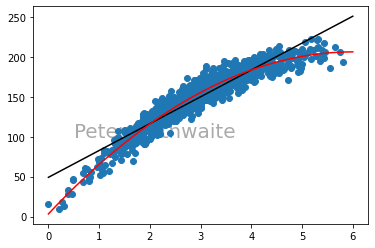

In [2]:
A = np.array([[np.sum(x), np.sum(x ** 2)], [len(x), np.sum(x)]])
B = np.array([np.dot(x, y), np.sum(y)]).T

beta = np.linalg.solve(A, B)

print(beta)

xLine = np.linspace(0, 6, 200)
yRegLin = beta[0] + beta[1]*xLine

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.plot(xLine, yRegLin, 'k')
name = 'Peter Huthwaite'
plt.text(0.5, 100, name, size=20, zorder=0., color='#aaaaaa')


A = np.array([[np.sum(x ** 2), np.sum(x ** 3), np.sum(x ** 4)], 
              [np.sum(x), np.sum(x ** 2), np.sum(x ** 3)],
              [len(x), np.sum(x), np.sum(x ** 2)]])
B = np.array([np.dot(x ** 2, y), np.dot(x, y), np.sum(y)]).T

betaQuad = np.linalg.solve(A, B)

print(betaQuad)

yRegQuad = betaQuad[0] + betaQuad[1]*xLine + betaQuad[2]*(xLine**2)

plt.plot(xLine, yRegQuad, 'r')




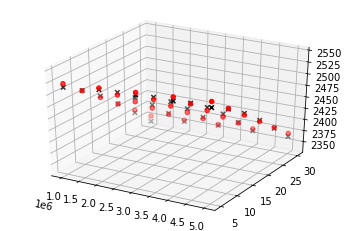

In [3]:
# read in the CSV file
df = pandas.read_csv('http://pogo.software/me4ml/hdpeVel.csv')
# set the 'index' column as the one containing the temperature values
df = df.set_index('T/C f/MHz')

# extract the frequency values (and scale since they are MHz)
freq = df.columns.values.astype(np.float) * 1e6
# extract the temperature values
temp = df.index.values.astype(np.float)

# extract the main part - the velocity values
vel = df.to_numpy()
# calculate the total number of values
tot_values = len(freq) * len(temp)


x1grid, x2grid = np.meshgrid(freq, temp) 
Xgrid = np.concatenate([x1grid.reshape([tot_values, 1]), 
	x2grid.reshape([tot_values, 1])], axis=1) 
ygrid = vel.reshape([tot_values, 1])


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(Xgrid, ygrid)

y_lin = reg.predict(Xgrid)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(Xgrid[:, 0], Xgrid[:, 1], ygrid, marker='x', color='#000000') 
ax.scatter(Xgrid[:, 0], Xgrid[:, 1], y_lin, marker='o', color='#ff0000')

In [4]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Xgrid[:, 0], y=Xgrid[:, 1], z=ygrid[:, 0], mode='markers',
                                       marker=dict(size=2, color='#000000', symbol='x')))

fig.add_trace(go.Scatter3d(x=Xgrid[:, 0], y=Xgrid[:, 1], z=y_lin[:, 0], mode='markers',
                                       marker=dict(size=3, color='#ff0000', symbol='circle')))


In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2) 
#generate the new feature vector:
X_poly = poly.fit_transform(Xgrid)

#check its shape
print(X_poly.shape)

(30, 6)


In [6]:
print(poly.powers_)

[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [7]:
reg_poly = LinearRegression() 
reg_poly.fit(X_poly, ygrid)

y_poly = reg_poly.predict(X_poly)

fig.add_trace(go.Scatter3d(x=Xgrid[:, 0], y=Xgrid[:, 1], z=y_poly[:, 0], mode='markers',
                                       marker=dict(size=3, color='#00ff00', symbol='diamond')))
